In [134]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [159]:
data = pd.read_csv('C:/Users/Income_K-NN.csv')
data = data.iloc[:,1:]
data.head()

,Transaction ID,Actual Class,Predicted Class,Posterior Probability
0,1.0,<=50K,<=50K,0.8
1,2.0,<=50K,<=50K,1.0
2,3.0,>50K,<=50K,0.8
3,4.0,<=50K,<=50K,0.8
4,5.0,<=50K,<=50K,1.0


In [165]:
# Count TP, TN, FP & FN
positive_data = data.loc[data['Actual Class'] == ' >50K']
negative_data = data.loc[data['Actual Class'] == ' <=50K']
TP = positive_data.loc[positive_data['Actual Class'] == positive_data['Predicted Class']].shape[0]
TN = negative_data.loc[negative_data['Actual Class'] == negative_data['Predicted Class']].shape[0]
FP = negative_data.loc[negative_data['Actual Class'] != negative_data['Predicted Class']].shape[0]
FN = positive_data.loc[positive_data['Actual Class'] != positive_data['Predicted Class']].shape[0]

l = [[TP, FN], [FP, TN]]
np.reshape(np.array(l),(2,2))
in_df = pd.DataFrame(l)
in_df.index=['>50K','<=50K']
in_df.columns = ['>50K','<=50K']
in_df

,>50K,<=50K
>50K,23,41
<=50K,17,187


In [162]:
# Calculate Precision, Measure & F-Measure
precision = (float)(TP / (TP+FP))
recall = (float)(TP / (TP+FN))
f_measure = (float) (2 * recall * precision / (recall + precision))
dict = {'Prescision':precision , 'Recall':recall, 'F_Measure':f_measure}
dict

{'F_Measure': 0.4423076923076923, 'Prescision': 0.575, 'Recall': 0.359375}

In [164]:
#Plot Roc Curve
act = pd.DataFrame()
act['act'] = data['Actual Class']
act.act = act.act.astype('category')
act.act = act.act.cat.codes
pred = pd.DataFrame()
pred['pred'] = data['Posterior Probability']

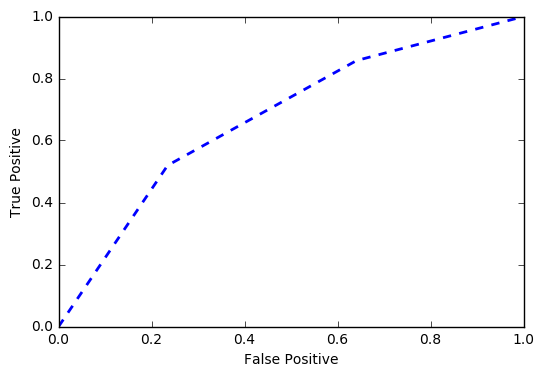

In [166]:
false_positive_rate, true_positive_rate, _ = roc_curve(act, pred)
plt.plot(true_positive_rate, false_positive_rate, linestyle='dashed' , linewidth=2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()